In [ ]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 5.1 MB/s 
     |████████████████████████████████| 981 kB 52.7 MB/s 
     |████████████████████████████████| 5.3 MB 50.8 MB/s 
     |████████████████████████████████| 19.7 MB 381 kB/s 
     |████████████████████████████████| 1.2 MB 51.8 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 163 kB 62.2 MB/s 
     |████████████████████████████████| 1.6 MB 58.5 MB/s 
     |████████████████████████████████| 788 kB 58.4 MB/s 
     |████████████████████████████████| 200 kB 63.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 7.6 MB 35.7 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=f1ed884645e8def9bfef398f49f44e401bfe60fe0ffb240e08faea7b4e7cb034
  Store

In [ ]:
import pandas as pd

from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus
from flair.datasets import TREC_6
from flair.embeddings import TransformerDocumentEmbeddings, DocumentPoolEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from flair.data import Sentence
from flair.models import TARSClassifier
from flair.embeddings import FlairEmbeddings, PooledFlairEmbeddings
from flair.data import Dictionary
from flair.embeddings import FlairEmbeddings
from flair.trainers.language_model_trainer import LanguageModelTrainer, TextCorpus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt


In [ ]:
#importing classifier
classifier = TextClassifier.load('/content/drive/MyDrive/CE4045/Classification/flair_distil_bert/results/taggers/question-classification-with-transformer/final-model.pt')

2022-10-31 11:01:59,218 loading file /content/drive/MyDrive/CE4045/Classification/flair_distil_bert/results/taggers/question-classification-with-transformer/final-model.pt


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/CE4045/nlp_vader_textblob_classified_data_updated.xlsx").drop_duplicates()


In [ ]:
test_data = data[data.label.notnull()]

In [ ]:
test_data = test_data[test_data.username != "Dan1el_San"]
test_data = test_data[test_data.vader_preprocessing_text.notnull()]
test_data = test_data[test_data.vader_preprocessing_text != 'NaN']

In [ ]:
inference=[]
i=0
try:
  for item in test_data['vader_preprocessing_text']:
      sentence = Sentence(item)
      classifier.predict(sentence)

      inference += [float(sentence.labels[0].value)]
      
      i += 1
      if i%500==0:
        print(i)
  test_data['inference']=inference
except:
  print(i,item)


500
1000
1500
2000
2500
3000
3500
4000
4500
5000


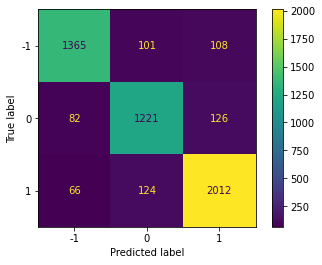

In [ ]:
labels = [-1, 0, 1]
cm = confusion_matrix(test_data["label"], test_data["inference"], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [ ]:
print(classification_report(test_data["label"], test_data["inference"]))

              precision    recall  f1-score   support

        -1.0       0.90      0.87      0.88      1574
         0.0       0.84      0.85      0.85      1429
         1.0       0.90      0.91      0.90      2202

    accuracy                           0.88      5205
   macro avg       0.88      0.88      0.88      5205
weighted avg       0.88      0.88      0.88      5205

